In [1]:
import tweepy
import time
import math
import pandas as pd

In [2]:
access_token = "2413986637-DtjxGNmKYarpRwwqKK95A1r8S5dX5Fyq2ta3E2K"
access_token_secret = "x75c1CKuNXJHzZq4RZHKWsxyVMhOIrL15K5o9HMdnJVO2"
consumer_key = "CT2cCmaVGPpzO3IL3bDdTkctQ"
consumer_secret = "8AkR9SqifUBwgs8hKpYHVkOG9rdmvmLDzAApiXcfyZcVpJMZiK"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [4]:
me = api.get_user(screen_name ='HuaweiMobile')
me.id

167324989

In [5]:
user_list = ["167324989"]
follower_list = []
a = 0
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
            if (len(followers) == 5000):
                break
    except tweepy.TweepError:
        print("error")
        continue

5000


In [6]:
df = pd.DataFrame(columns=['source','target'])
a = 0
for i in followers:
    if (a < 100):
        me = api.get_user(i)
        follower_list.append(me.screen_name)
        a = a + 1
    
df['target'] = follower_list
ss = api.get_user(167324989)
df['source'] = ss.screen_name

In [8]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

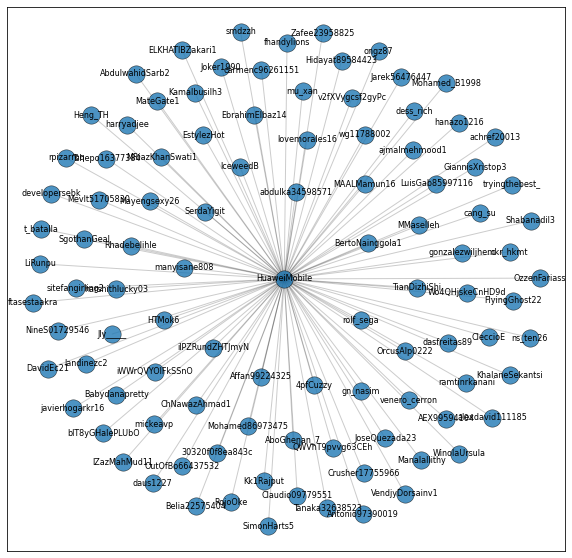

In [9]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [10]:
user_list = list(df['target']) 
for userID in user_list:
    print(userID)
    uuid = api.get_user(screen_name =userID)
    followers = []
    follower_list = []

    
    user = api.get_user(uuid.id)

    
    followers_count = user.followers_count

    try:
        time.sleep(60)
        for page in tweepy.Cursor(api.followers_ids, user_id=uuid.id).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    temp = pd.DataFrame(columns=['source', 'target'])
    for i in followers:
        try:
            me = api.get_user(i)
            follower_list.append(me.screen_name)
        except:
            print("error")
            continue
    temp['target'] = follower_list
    temp['source'] = uuid.screen_name
    df = df.append(temp)
    df.to_csv("networkOfFollowers_Huawei.csv")

rolf_sega
sitefangirling2
5
manyisane808
DavidEc21
EbrahimElbaz14
4
AboGhenan_7
377
Mevlt51705830
tryingthebest_
5
abdulka34598571
2
blT8yGHaIePLUbO
error
Kk1Rajput
6
Wo4QHjskeCnHD9d
4pfCuzzy
1
javierhogarkr16
26
AbdulwahidSarb2
13
gn_nasim
154
WinolaUrsula
dasfreitas89
error
Tshepo16377384
error
SimonHarts5
1
OrcusAlp0222
2
mickeavp
error
Antonio97390019
9
ajmalmehmood1
907
ChNawazAhmad1
23
v2fXVygcsf2gyPc
3
achref20013
10
Hidayat89584423
57
ELKHATIBZakari1
QWVhT9pvvg63CEh
1
iIPZRundZHTJmyN
7
Mohamed_B1998
error
Jly_____
4
AEX99594104
1
dess_rich
cang_su
1
Mayengsexy26
1
KhalaneSekantsi
developersebk
94
daus1227
3
smdzzh
error
ftasestaakra
44
Jarek56476447
5
Joker1990
11
CleccioE
87
MAALMamun16
34
landinezc2
error
alexdavid111185
18
harshithlucky03
1
NineS01729546
2
ckr_hkmt
4
wg11788002
GiannisXristop3
125
error
Zafee23958825
4
IceweedB
30320f0f8ea843c
11
gonzalezwiljhem
20
Crusher17755966
305
VendjyDorsainv1
2
t_batalla
1
ns_ten26
1
carmenc96261151
54
MRiazKhanSwati1
17
IZazMahMud11

Rate limit reached. Sleeping for: 451


error


Rate limit reached. Sleeping for: 575


error


Rate limit reached. Sleeping for: 590


error


Rate limit reached. Sleeping for: 606


error
error


Rate limit reached. Sleeping for: 639


error
iWWrQVYOlFkSSnO
LuisGab85997116
80
Babydanapretty
1
SgothanGeal
691


Rate limit reached. Sleeping for: 398


error
EstylezHot
198
Belia22575404
8
RojoOke
1
OutOfBo66437532
3
TianDizhiShi
2
fhandylions
147
ongz87
1556


Rate limit reached. Sleeping for: 213
Rate limit reached. Sleeping for: 620


error
MMaselleh
Tanaka32638523
2
Heng_TH
error
mu_xan
1
Kamalbusilh3
Mohamed86973475
3
Manalallithy
error
MateGate1
1
ramtinrkanani
9
SerdaYigit
6
OzzenFariass
1
HTMok6
4
FlyingGhost22
error
LiRunpu


In [11]:
df1 = pd.read_csv("networkOfFollowers_Huawei.csv") #Read into a df
G = nx.from_pandas_edgelist(df1, 'source', 'target')

In [12]:
G.number_of_nodes() #Find the total number of nodes in this graph

10556

In [13]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

,nconst,degree
0,Rhadebelihle,4995
1,ongz87,1556
2,ajmalmehmood1,908
3,SgothanGeal,691
4,AboGhenan_7,378


In [14]:
u = api.get_user(1433645197)
u.screen_name

'DaGattaGH'

In [15]:
nx.write_gexf(G, 'Huawei.gexf')

In [16]:
print(len(follower_list))

0
